In [1]:
import pandas as pd
import numpy as np

In [2]:
## load  the dataset and read the first of records

In [3]:
data_set=pd.read_csv("dataset.csv")
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
## select the columns

In [5]:
data_set=data_set[['Annual Income (k$)','Spending Score (1-100)']]
data_set.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
## check the information of dataset

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [8]:
## Rename the colum names

In [9]:
data_set=data_set.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'score'})

In [10]:
data_set.columns

Index(['Income', 'score'], dtype='object')

In [11]:
data_set.sample(5)

,Income,score
67,48,48
47,40,47
87,57,55
2,16,6
48,40,42


## Explotary Data Analysis

In [12]:
## Plot the data in the scatterplot

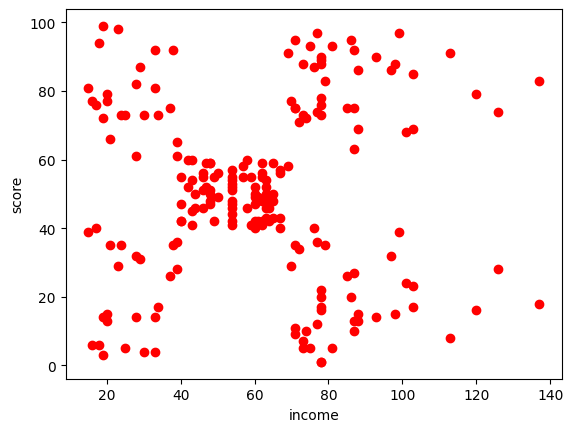

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data_set['Income'],data_set['score'], color='red')
plt.xlabel('income')
plt.ylabel('score')
plt.show()

In [14]:
## check the null values 

In [15]:
data_set.isnull().sum()

Income    0
score     0
dtype: int64

In [16]:
## check the duplicate values

In [17]:
data_set.duplicated().sum()

4

In [18]:
## Drop the duplicate values from the data

In [19]:
data_set=data_set.drop_duplicates()
data_set.duplicated().sum()

0

In [20]:
data_set.head()

,Income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
data_set.duplicated().sum()

0

In [26]:
## Idendify the suitable k value and calculate the wcss error

In [27]:
from sklearn.cluster import KMeans
k_values=[1,2,3,4,5,6,7,8,9,10]
wcss_error=[]
for k in k_values:
    model=KMeans(n_clusters=k)
    model.fit(data_set)
    wcss_error.append(model.inertia_)


In [28]:
wcss_error

[265804.27551020414,
 184311.41571667427,
 105468.50017046189,
 72863.31192436458,
 43333.95278022046,
 37931.8734373443,
 31573.5277739804,
 30578.332829113493,
 22343.953665129528,
 21911.983726220016]

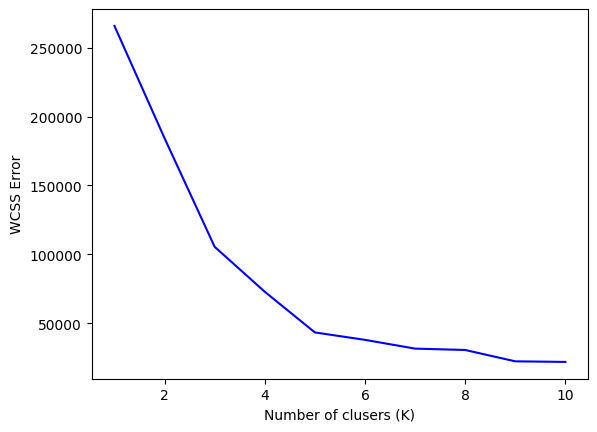

In [35]:
plt.plot(k_values,wcss_error, color='blue')
plt.xlabel("Number of clusers (K)")
plt.ylabel("WCSS Error")
plt.show()

In [30]:
## when it comes to the above plot, best k value is 5. Above plot slope will highle change at when the k value becomes 5

In [31]:
## lets train KMeans clustering algorithm using n_clusters as 5

In [33]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5)
predictions=model.fit_predict(data_set)

In [34]:
predictions

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [36]:
data_set.head(5)

,Income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [37]:
## add the predictions as column into the existing dataset

In [41]:
data_set['clusters']=predictions
data_set.head(100)

,Income,score,clusters
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
97,60,50,2
98,61,42,2
99,61,49,2
100,62,41,2


In [42]:
## Filter the clustered values seperately

In [50]:
c0=data_set[data_set['clusters']==0]
c0.head()

,Income,score,clusters
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
133,72,71,0


In [51]:
c1=data_set[data_set['clusters']==1]
c1.head()

,Income,score,clusters
124,70,29,1
128,71,11,1
130,71,9,1
132,72,34,1
134,73,5,1


In [52]:
c2=data_set[data_set['clusters']==2]
c2.head()

,Income,score,clusters
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
50,42,52,2


In [54]:
c3=data_set[data_set['clusters']==3]
c3.head()

,Income,score,clusters
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3


In [55]:
c4=data_set[data_set['clusters']==4]
c4.head()

,Income,score,clusters
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4


In [57]:
## plot the clusters seperately

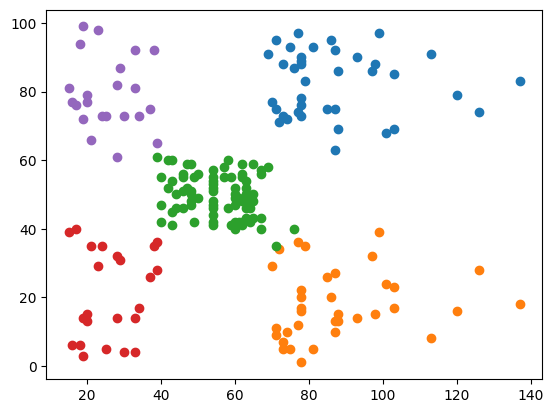

In [60]:
plt.scatter(c0['Income'],c0['score'])
plt.scatter(c1['Income'],c1['score'])
plt.scatter(c2['Income'],c2['score'])
plt.scatter(c3['Income'],c3['score'])
plt.scatter(c4['Income'],c4['score'])